# Terrorisme mondial

---
## Importation des librairies

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.rcmod as rc

---
## Importation du jeu de données

In [40]:
gb = pd.read_csv("/home/vincent/Hitema/Cours/Machine Learning/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/home/vincent/.local/share/virtualenvs/MachineLearning-p2QxMSww/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


---
## Informations du jeu de données

In [41]:
gb.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

In [42]:
gb.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


---
## Suppression des colonnes non utilisées

In [43]:
terrorism = gb.drop(columns={'approxdate',
                      'resolution',
                      'location',
                      'summary',
                      'alternative',
                      'alternative_txt',
                      'attacktype2',
                      'attacktype2_txt',
                      'attacktype3',
                      'attacktype3_txt',
                      'corp1',
                      'targtype2',
                      'targtype2_txt',
                      'targsubtype2',
                      'targsubtype2_txt',
                      'corp2',
                      'target2',
                      'natlty2',
                      'natlty2_txt',
                      'targtype3',
                      'targtype3_txt',
                      'targsubtype3',
                      'targsubtype3_txt',
                      'corp3',
                      'target3',
                      'natlty3',
                      'natlty3_txt',
                      'gsubname',
                      'gname2',
                      'gsubname2',
                      'gname3',
                      'gsubname3',
                      'motive',
                      'guncertain2',
                      'guncertain3',
                      'nperpcap',
                      'claimmode',
                      'claimmode_txt',
                      'claim2',
                      'claimmode2',
                      'claimmode2_txt',
                      'claim3',
                      'claimmode3',
                      'claimmode3_txt',
                      'compclaim',
                      'weaptype2',
                      'weaptype2_txt',
                      'weapsubtype2',
                      'weapsubtype2_txt',
                      'weaptype3',
                      'weaptype3_txt',
                      'weapsubtype3',
                      'weapsubtype3_txt',
                      'weaptype4',
                      'weaptype4_txt',
                      'weapsubtype4',
                      'weapsubtype4_txt',
                      'nkillus',
                      'nkillter',
                      'nwoundus',
                      'nwoundte',
                      'property',
                      'propextent',
                      'propextent_txt',
                      'propvalue',
                      'propcomment',
                      'ishostkid',
                      'nhostkid',
                      'nhostkidus',
                      'nhours',
                      'ndays',
                      'divert',
                      'kidhijcountry',
                      'ransom',
                      'ransomamt',
                      'ransomamtus',
                      'ransompaid',
                      'ransompaidus',
                      'ransomnote',
                      'hostkidoutcome',
                      'hostkidoutcome_txt',
                      'nreleased',
                      'addnotes',
                      'scite1',
                      'scite2',
                      'scite3',
                      'INT_LOG',
                      'INT_IDEO',
                      'INT_MISC',
                      'INT_ANY',
                      'related',
                      'dbsource'
                      })

---
## Renommage des colonnes

In [44]:
terrorism.rename(columns={'iyear':'Year',
                          'imonth':'Month',
                          'iday':'Day',
                          'country_txt':'Country',
                          'region_txt':'Region',
                          'attacktype1_txt':'AttackType',
                          'target1':'Target',
                          'nkill':'Killed',
                          'nwound':'Wounded',
                          'summary':'Summary',
                          'gname':'Group',
                          'targtype1_txt':'Target_type',
                          'weaptype1_txt':'Weapon_type',
                          'motive':'Motive'},
                 inplace=True)

---
## Infos du jeu de données reformaté

In [45]:
terrorism.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   Day               181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   Country           181691 non-null  object 
 7   region            181691 non-null  int64  
 8   Region            181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

---
## Evolution du terrorisme de 1970 à 2017

/home/vincent/.local/share/virtualenvs/MachineLearning-p2QxMSww/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


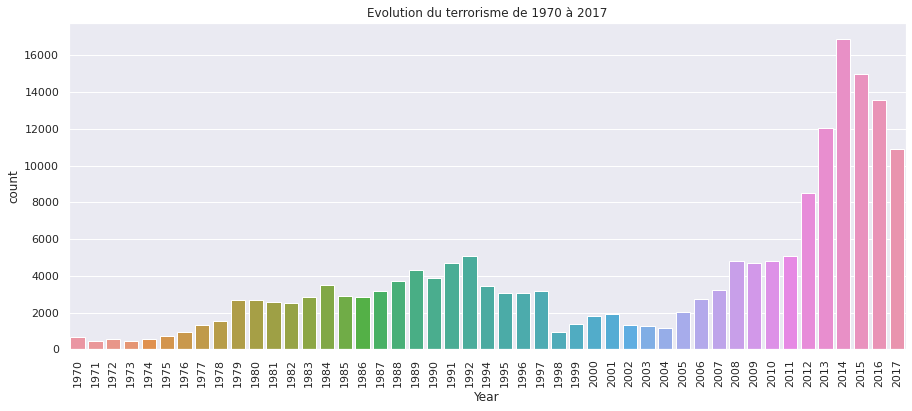

In [57]:
rc.set_theme()
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=terrorism)
plt.xticks(rotation=90)
plt.title("Evolution du terrorisme de 1970 à 2017")
plt.show()

---
## Visualisation des méthodes utilisées pour les attaques

/home/vincent/.local/share/virtualenvs/MachineLearning-p2QxMSww/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


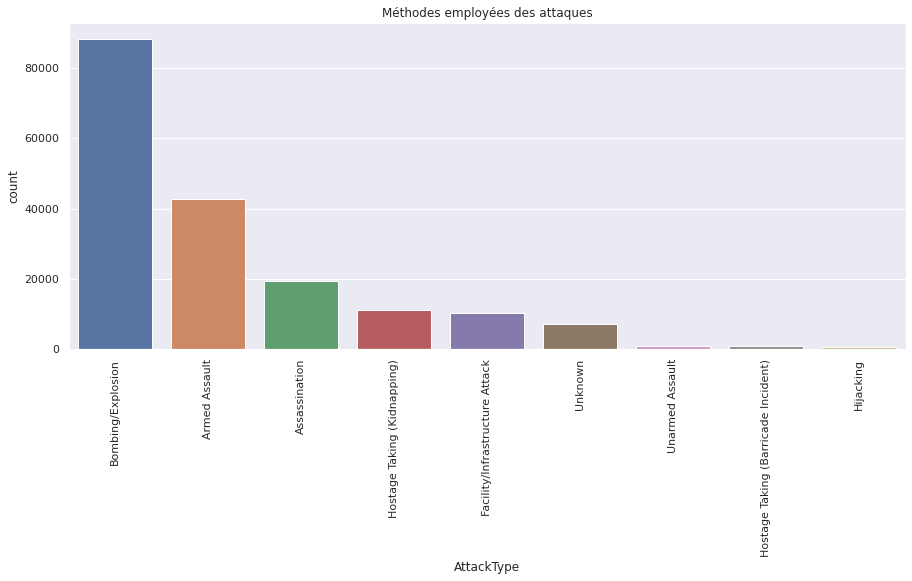

In [47]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType', data=terrorism, order=terrorism['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Méthodes employées des attaques')
plt.show()

---
## Visualisation des cibles des attaques

/home/vincent/.local/share/virtualenvs/MachineLearning-p2QxMSww/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


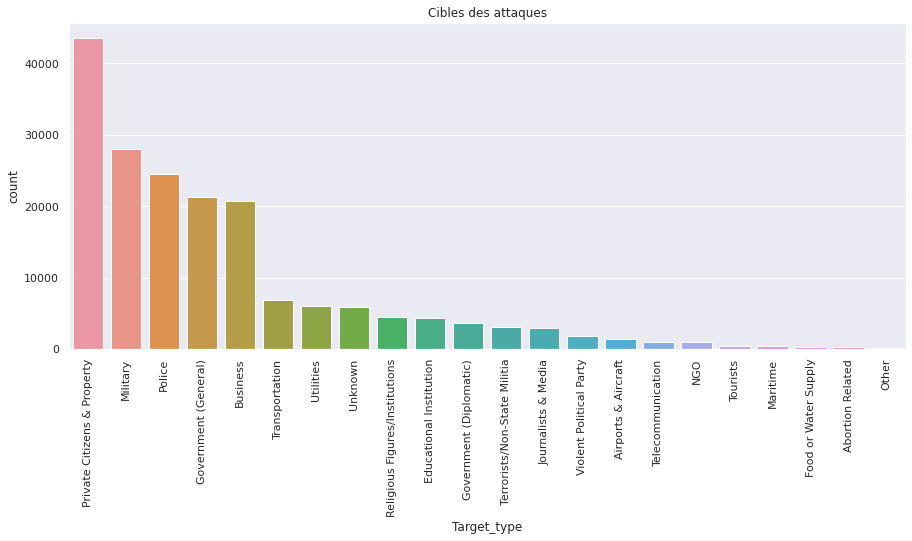

In [48]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorism['Target_type'], order=terrorism['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cibles des attaques')
plt.show()

---
## Visualisation des attaques par région

/home/vincent/.local/share/virtualenvs/MachineLearning-p2QxMSww/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


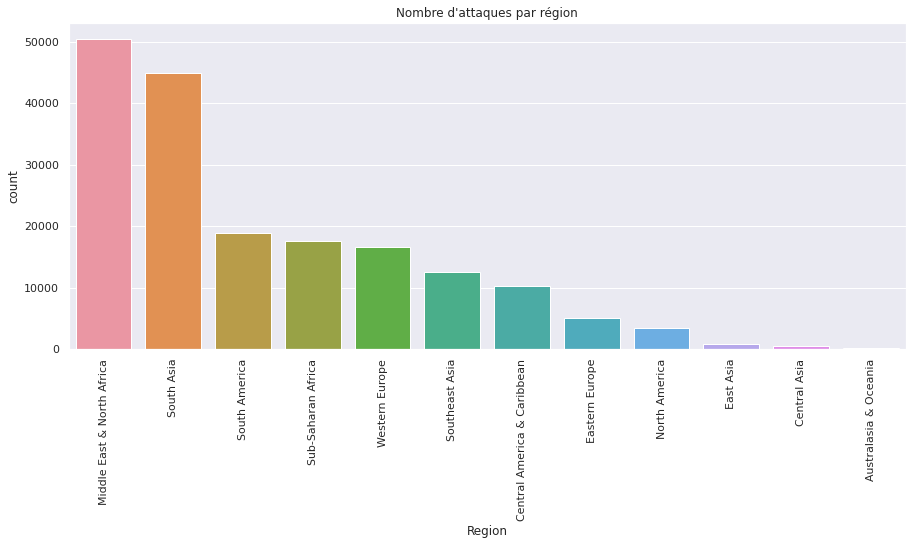

In [49]:
plt.subplots(figsize=(15,6))
sns.countplot('Region', data=terrorism,order=terrorism['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Nombre d\'attaques par région')
plt.show()

---
## Evolution dans le temps des attaques par région

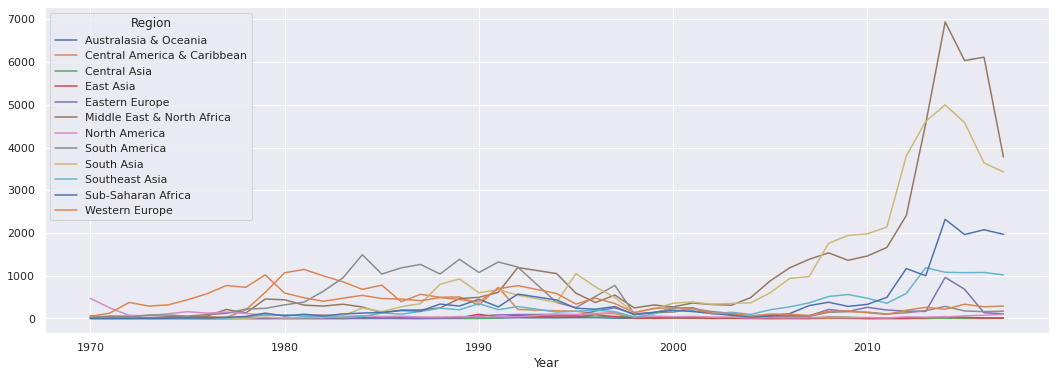

In [50]:
terror_region=pd.crosstab(terrorism.Year, terrorism.Region)
terror_region.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

---
## Visualisation du nombre d'attaques par pays

/home/vincent/.local/share/virtualenvs/MachineLearning-p2QxMSww/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


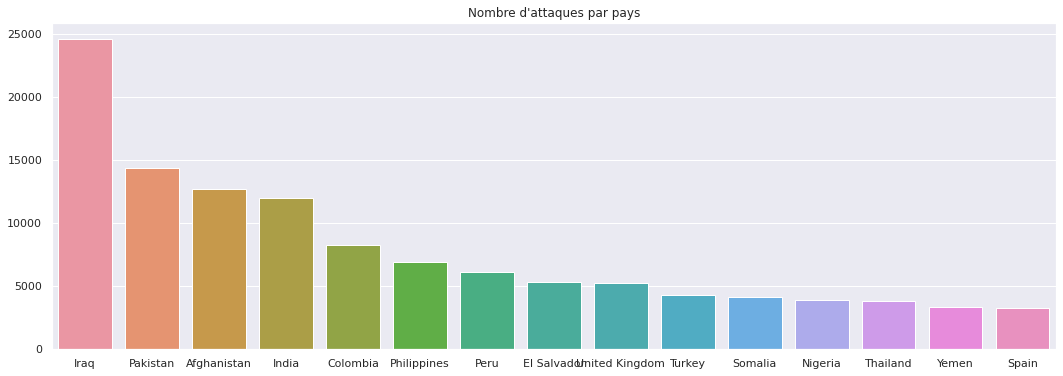

In [51]:
plt.subplots(figsize=(18,6))
sns.barplot(terrorism['Country'].value_counts()[:15].index,terrorism['Country'].value_counts()[:15].values)
plt.title('Nombre d\'attaques par pays')
plt.show()

---
## Comparaison du nombre d'attaques et de morts par pays

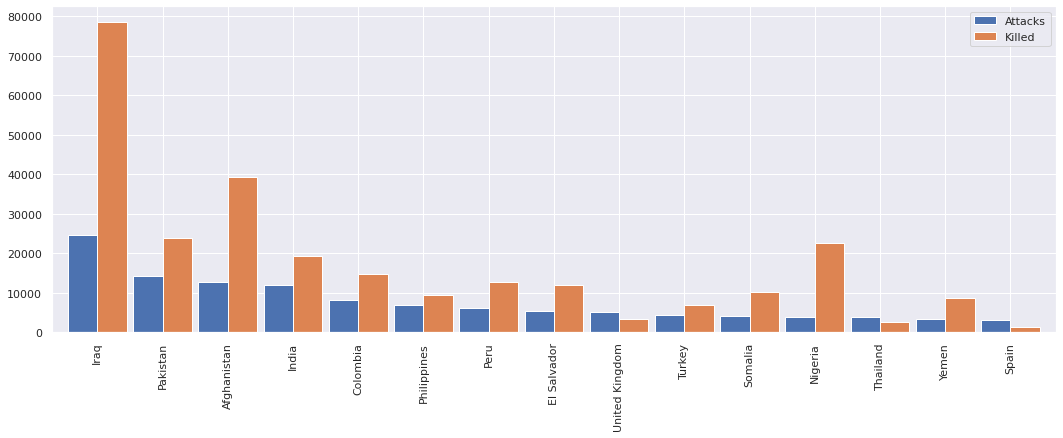

In [52]:
coun_terror=terrorism['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terrorism.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

---
## Nombre d'attaques par groupe terroriste

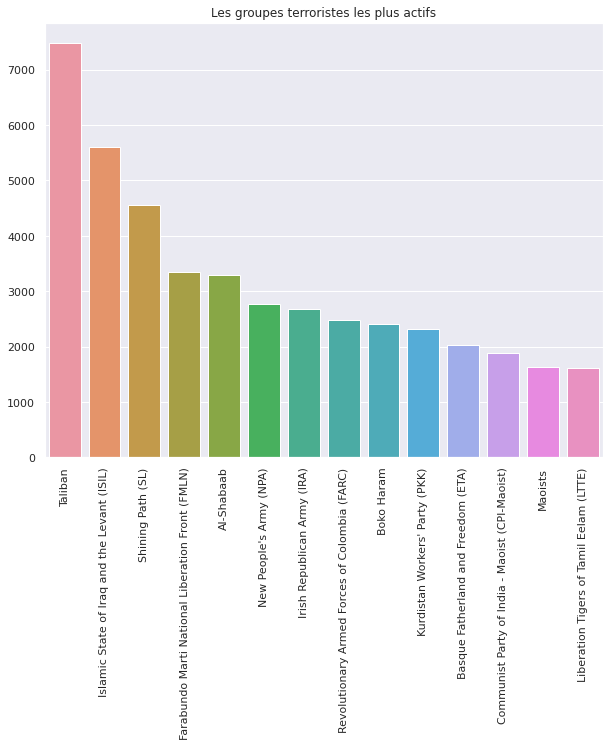

In [53]:
sns.barplot(y=terrorism['Group'].value_counts()[1:15].values,x=terrorism['Group'].value_counts()[1:15].index)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Les groupes terroristes les plus actifs')
plt.show()

---
## Evolution de l'acitivté terroriste par groupe

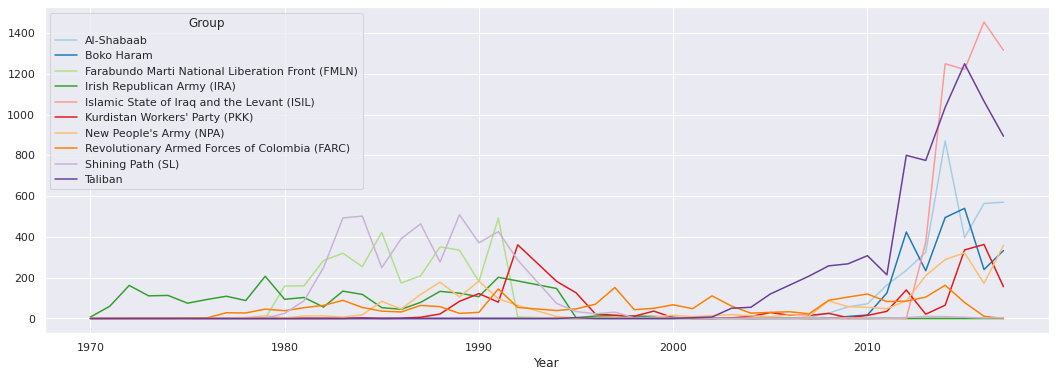

In [54]:
top_groups10=terrorism[terrorism['Group'].isin(terrorism['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

---
## Visualisation de la heatmap de corrélation

In [55]:
corrTerr = terrorism.corr()
corrTerr

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,targsubtype1,natlty1,guncertain1,individual,nperps,claimed,weaptype1,weapsubtype1,Killed,Wounded
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,0.048798,-0.019084,0.040647,0.017939,-0.137408,0.141600,-0.011716,0.101733,0.015351,0.015282
Year,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,0.048794,-0.019068,0.040656,0.017944,-0.137459,0.141486,-0.011737,0.101727,0.015341,0.015273
Month,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,0.001508,-0.004838,-0.004460,-0.001661,0.014354,0.023083,0.007863,0.002142,0.003463,0.002938
Day,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,-0.003184,0.003845,-0.002186,-0.003788,-0.013527,0.004474,-0.003019,0.006182,-0.003693,-0.001268
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,0.022996,0.013609,0.033464,-0.008929,-0.004691,0.006779,0.207802,-0.121002,0.027737,-0.006627
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,0.178567,-0.000269,-0.084599,...,-0.014046,0.600020,-0.010369,0.027918,-0.001057,-0.012704,-0.023708,-0.027315,-0.014902,-0.003530
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.309274,0.004351,-0.084198,...,0.030704,0.149821,-0.022758,-0.059963,-0.075037,0.003608,0.013257,0.092198,0.042062,0.020472
latitude,0.166886,0.166933,-0.015978,0.003423,-0.024749,0.178567,0.309274,1.000000,0.001463,-0.018811,...,-0.042050,-0.003098,-0.064413,0.040649,-0.074284,0.023153,-0.011710,0.125507,-0.018124,0.015988
longitude,0.003907,0.003917,-0.003880,-0.002285,0.000523,-0.000269,0.004351,0.001463,1.000000,0.001065,...,-0.004049,-0.000444,0.000724,0.000114,-0.010808,0.001634,0.001582,0.003577,-0.000562,0.000223
specificity,0.030641,0.030626,0.003621,-0.006991,0.057897,-0.084599,-0.084198,-0.018811,0.001065,1.000000,...,0.040493,-0.034336,-0.009168,-0.022631,-0.013259,-0.009675,0.064587,-0.088720,0.022335,-0.015764


<AxesSubplot:>

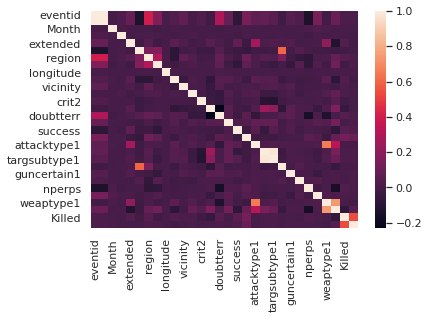

In [56]:
sns.heatmap(corrTerr)